In [2]:
#решение первой задачи из экзамена по машинному обучению
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [6]:
data_train = pd.read_csv('train.csv',header=None)
data_test = pd.read_csv('test.csv',header=None)
data_labels_train = pd.read_csv('train-target.csv',header=None)

data_train.head()



,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-220.530530,-70.197440,119.035181,20.711737,-6.152986,52.225051,-23.230903,-166.521871,-41.571463,2.620401,...,16.936420,46.543585,-80.962171,-146.652218,10.899085,4.370985,4.060272,40.680890,-37.942655,33.838225
1,-8.536541,-8.305435,-117.828269,-28.588333,14.223240,-42.087807,-45.538664,58.898976,27.749744,2.545916,...,57.027508,121.304258,31.507396,88.282912,66.766185,-4.363974,-5.791376,-32.101939,-52.255449,-4.826111
2,126.229973,133.463504,-105.511797,-149.110267,-3.673355,-104.302244,5.815395,100.838385,-46.240211,0.141700,...,4.819849,88.905713,51.475105,-73.257358,108.947287,8.567240,0.116269,-117.205053,-107.835928,-93.990332
3,369.571563,11.850181,-299.969407,29.371721,-3.457523,-115.901854,159.134323,-149.741411,-108.847522,0.078277,...,80.930568,-166.476192,-73.882682,108.222355,19.573192,-2.242024,0.515601,-25.218215,121.674228,-16.877368
4,-99.563708,-85.166292,-73.363391,-35.357907,5.437025,-54.892519,56.430532,-49.237377,-50.054608,2.586612,...,31.682235,209.163125,-22.847302,-62.067337,58.109167,2.862082,0.920341,-132.875142,3.492953,-15.799596


In [9]:
data_test.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,394.650101,-102.778703,-48.854416,17.463193,4.744214,-90.504260,135.111157,-27.691507,192.961067,1.755201,...,-56.947165,140.952506,1.885744,11.483086,-131.665132,12.876561,0.156747,-185.849095,-29.314711,-84.254441
1,62.200701,-139.323500,235.644493,10.860594,1.921110,39.088440,-186.024836,-53.158605,-122.290561,1.426944,...,-45.854744,-148.360929,2.614495,-24.895114,-40.050598,7.376349,1.962719,-123.776910,65.756136,-10.378203
2,232.736729,5.502143,204.738165,45.738959,1.338264,33.604743,92.235943,-115.127927,-95.263085,2.048801,...,-15.638165,-234.606490,0.409558,286.011182,48.109151,-9.277772,1.838195,19.461847,126.144518,-121.300353
3,340.045437,-129.924115,62.694027,61.899097,-1.294288,-58.616589,-55.080664,10.115134,9.051856,2.732693,...,13.407883,-56.332212,2.801811,70.875892,26.673509,2.389621,2.188665,109.700845,109.378365,-58.425305
4,-60.576957,71.958472,489.203093,121.380719,-3.620431,44.666983,-161.487192,137.920737,540.680255,1.172919,...,-51.559846,-6.645415,1.889414,-21.814728,-91.701674,-9.206418,1.211916,-11.602746,-8.162451,-87.902970


In [12]:
data_labels_train.head()

,0
0,1
1,1
2,0
3,0
4,1


In [34]:
#sns.pairplot(data_test,diag_kind="kde")   картинка data_test_pairplot в приложенных файлах

In [35]:
data=data_train.copy()
data['label']=data_labels_train

#sns.pairplot(data,hue='label',diag_kind="kde")  картинка data_train_pairplot в приложенных файлах

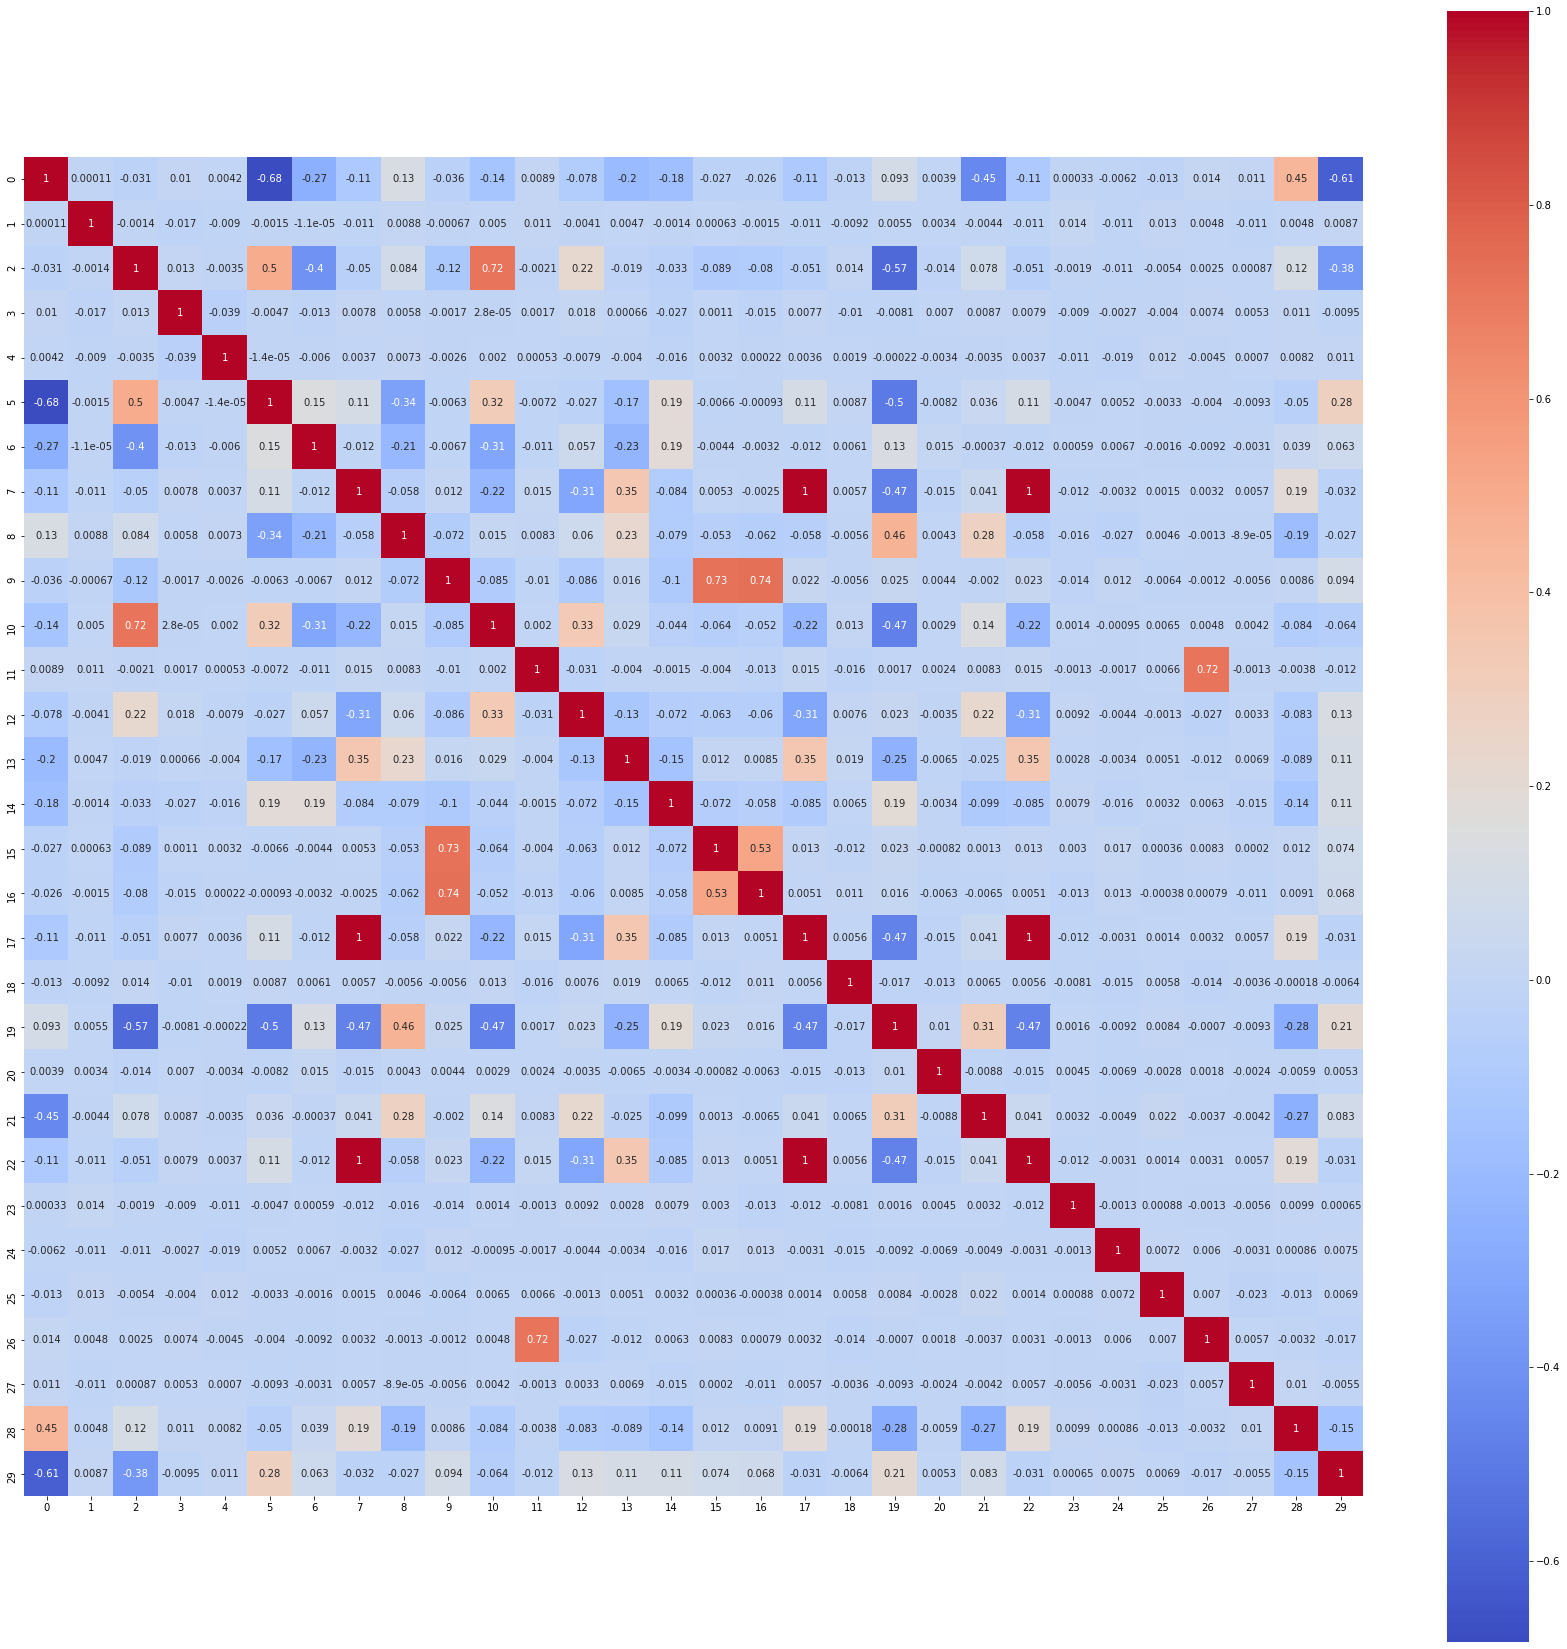

In [11]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data_train.corr(), square=True, cmap= 'coolwarm',annot = True)

In [28]:
indices=[9,15,16,17,22,26]   # исключим коррелированные признаки, и признак №9, по которому разделяются классы в data_train, 
                             #но не в data_test 
data_train_new=data_train.drop(indices,axis=1)
data_test_new=data_test.drop(indices,axis=1)

In [29]:
  (X_train,  X_test,  y_train, y_test) = train_test_split(data_train_new, data_labels_train, test_size=0.3, 
                                     random_state=0)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
data_test_new_scaled=scaler.transform(data_test_new)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb1= GradientBoostingClassifier()
parameters_grid = {
    'max_depth' : [2,3,5,10],
    'n_estimators' : [50,100,200,500]}
cv = StratifiedShuffleSplit(n_splits=4, test_size = 0.25, random_state = 0)
grid_cv = GridSearchCV(gb1, parameters_grid, scoring = 'roc_auc', cv = cv)

grid_cv.fit(X_train_scaled, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

y_predicted_2=grid_cv.predict_proba(data_test_new_scaled)[:,1]
print(y_predicted_2)
preds = pd.DataFrame(y_predicted_2)
preds.to_csv('preds2.csv', header=False, index=False)


0.8119908172370771
{'max_depth': 10, 'n_estimators': 500}
[0.00548819 0.22081116 0.01023823 ... 0.00875782 0.03578889 0.9973246 ]


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)#(n_estimators = 150,max_depth=20,random_state=0)
parameters_grid = {
    'max_depth' : [2,5,10,20],
    'n_estimators': [50,100,150]}
cv = StratifiedShuffleSplit(n_splits=4, test_size = 0.25, random_state = 0)
grid_cv_rf = GridSearchCV(rf_classifier, parameters_grid, scoring = 'roc_auc', cv = cv)


grid_cv_rf.fit(X_train_scaled, y_train)
print(grid_cv_rf.best_score_)
print(grid_cv_rf.best_params_)

y_pred=grid_cv_rf.predict_proba(X_test_scaled)[:,1]
score=roc_auc_score(y_test,y_pred)
print(score)

y_predicted=grid_cv_rf.predict_proba(data_test_new_scaled)[:,1]
preds = pd.DataFrame(y_predicted)
preds.to_csv('preds.csv', header=False, index=False)

0.8121058098683189
{'max_depth': 20, 'n_estimators': 150}
0.8231550703980595
